# Finance: E-sign loan

### Author: Harry Patterson

                                ====================================================

## Table of Contents 

### The Problem
- [Who will sign for loan?](#Problem)

### Data Quality Check
- [Simple Inspection of Data](#Datacleaning)

### Descriptive Statistics
- [Summary Statistics, Click Rate, Size of Data](#Descriptive_statistics)
- [Correlation Matrix](#Correlation_matrix)

### Exploratory Data Analysis
- [Examine Months/Years Employed](#Eda1)
- [Age, Personal Account M and Risk Score](#Eda2)
- [Some Visuals For Descriptive Figures](#Eda3)
- [Plots Against The Target Feature](#Eda4)

### Feature engineering 
- [Feature Engineering](#FE)

### Simple Pre-Processing
- [Pre-Processing: Categorical and Numerical Variable](#Pre_Processing)

### Model Selection
- [Model Selection](#MS)
- [Train_Test Split](#Train_Test)
- [Artificial Neural Network](#ANN)
- [Feature Engineering](#FE)
- [Random Forest](#RF)
- [Gradient Boosting](#GB)
- [Support Vector Machine](#SVM)
- [Xg Boost](#XG)

### Conclusion
- [Report](#Report)
- [Feature Importance](#FI)
- [Actionable Recommendations](#conclusion)


***

<a id='Problem'></a>
## The Problem

- Loan department needs to determine who will most likely sign for a loan or not. 

- For each customer given a loan. The company will incur a profit.  

- For each customer not given a loan. The company will incur a loss. 


***

## Objective: 
- To understand what factors contributed most to a customer signing for loan and paying back. 

- To create a model that predicts the likelihood if a customer will sign for loan or not. 

- To create or improve different strategies to try and lower the risk of giving a loan or not. 

- The utilization of the machine learning model will allow the company target specfic customers who will sign for loan based off financial history and different factors.

- To target customers who are most likey to sign for a loan. So, the company will take less risk of giving out a loan. 

***

## IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score, log_loss,f1_score,jaccard_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, fbeta_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import r2_score, mean_absolute_error
import scipy.stats

import matplotlib as mpl

In [2]:
# Functions to use later 

def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize=(16,10))
    sns.heatmap(corr,annot=True,
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
    print(corr)
    
def creating_histplot(size, data, features):  # (size:(height,length))
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(7, 3, i+1)     # (rows, columns)
        sns.histplot(data[features[i]])
        
def creating_boxplots(size, target, features, data):
    plt.figure(figsize=size)
    for i in range(len(num_vars)):
        plt.subplot(7, 3, i+1)
        sns.boxplot(x=target, y=features[i], data=data )

## READ IN THE DATA

In [4]:
loan_df = pd.read_csv('Data/financial_data.csv')
loan_df.head(10)

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
5,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
6,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
7,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1
8,6493191,32,semi-monthly,0,5260,3,0,3,1,4,...,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3,1
9,8908605,51,bi-weekly,1,3055,0,6,11,4,2,...,600,59750,0.624666,0.968565,0.509919,0.749624,0.758607,0.758607,5,1


In [4]:
num_vars = loan_df.select_dtypes(exclude=['object']).columns
target = "e_signed"

<a id='Datacleaning'></a>
# Data Quality Check
***

In [5]:
# looking at the main characteristics of our dataset
# such as the number of observations, the type of variables, the summary statistics for each variables, the number of missing data, etc.

loan_df.info()
print()
print(loan_df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [6]:
# check for duplicates 
print('Number of duplicated records in training set: ', loan_df.duplicated().sum())

Number of duplicated records in training set:  0


In [7]:
number_missing= loan_df.isnull().sum()
number_missing_df = pd.DataFrame({'number_missing': number_missing})

number_missing_df

,number_missing
entry_id,0
age,0
pay_schedule,0
home_owner,0
income,0
months_employed,0
years_employed,0
current_address_year,0
personal_account_m,0
personal_account_y,0


In [8]:
loan_df.shape

(17908, 21)

<a id='Descriptive_statistics'></a>
# Exploratory Data Analysis
***

In [9]:
# Finding the count of each class of dependent variable 
# 0 - Did sign 

print(sum(loan_df['e_signed'] == 1))
print(sum(loan_df['e_signed'] == 0))

9639
8269


In [10]:
# Looking at the distribution of the target feature
# Percentage of click vs non-click


esign_rate = loan_df['e_signed'].value_counts() / loan_df.shape[0]
esign_rate

1    0.538251
0    0.461749
Name: e_signed, dtype: float64

***
- Does not show a highly unbalanced data set for our class feature 

In [11]:
# Extract descriptive statistics
# Everything seems to be normal here
loan_df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


- Stats look pretty normal 

In [12]:
# Take a quick look at the categorical labels 
loan_df.describe(include='object')

,pay_schedule
count,17908
unique,4
top,bi-weekly
freq,10716


In [13]:
# check to see is there any real significance for the customers that did sign vs not sign
# show mean summary

esign_summary = loan_df.groupby('e_signed')
esign_summary.mean()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
e_signed,,,,,,,,,,,,,,,,,,,
0,5.589410e+06,44.258798,0.450478,3606.235941,1.159753,3.517717,3.641069,3.621478,3.554360,0.778329,897.977506,59655.339219,0.689855,0.880484,0.582325,0.719235,0.627959,0.625734,6.557020
1,5.603470e+06,41.948750,0.403465,3700.947712,1.208528,3.534703,3.536363,3.260504,3.459591,0.810043,995.457931,62313.881108,0.691755,0.876382,0.583867,0.717409,0.618955,0.618923,6.371615


- Noticing that customers that do not sign for loan have a higher mean income which can mean these customers believe they can pay back loan. 
- Customers that did sign for loan have a lower average debt which can mean these customers was approved for the loan. 
- Customers with higher with an average higher debt. Also, requested an average higher amount for loan. 

In [14]:
esign_summary.std()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
e_signed,,,,,,,,,,,,,,,,,,,
0,2.579921e+06,12.057605,0.497572,1432.167933,2.318078,2.212596,2.749779,2.294353,1.900933,0.415396,700.754938,15467.285367,0.091366,0.052243,0.125569,0.119168,0.135735,0.138164,3.833565
1,2.547525e+06,11.607473,0.490618,1563.334564,2.469630,2.299484,2.753010,2.133413,2.000312,0.392288,693.520970,15225.318076,0.089691,0.056412,0.124626,0.121994,0.142942,0.141300,3.527570


<a id='Correlation_matrix'></a>
### Correlation Matrix

***

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
entry_id,1.000000,0.004333,0.002528,-0.009034,0.015546,-0.000950,-0.001701,-0.000515,-0.007721,0.007476,0.001720,0.006780,0.013761,-0.005550,0.006963,0.004949,0.006025,0.006392,-0.003492,0.002735
age,0.004333,1.000000,0.142046,0.174062,-0.103635,0.182590,0.146554,-0.013609,0.041332,-0.043808,0.084132,0.162868,-0.019163,0.111258,0.069191,0.093710,0.032265,0.040019,0.041224,-0.096998
home_owner,0.002528,0.142046,1.000000,0.147487,0.018008,0.027367,0.179291,0.013782,-0.047105,-0.076206,0.033996,0.113608,0.000647,0.049708,-0.137293,-0.080470,0.010080,0.005507,0.011215,-0.047409
income,-0.009034,0.174062,0.147487,1.000000,-0.049157,0.102139,0.046982,0.009052,-0.002002,-0.011199,0.289099,0.168375,-0.023627,0.058665,-0.001254,0.025179,-0.008429,-0.003323,0.051622,0.031377
months_employed,0.015546,-0.103635,0.018008,-0.049157,1.000000,-0.189805,-0.056609,0.211605,-0.019645,-0.000546,-0.044234,-0.044765,0.028950,-0.024297,-0.014512,-0.019406,-0.009041,-0.004461,-0.026710,0.010128
years_employed,-0.000950,0.182590,0.027367,0.102139,-0.189805,1.000000,0.343905,-0.052543,0.184879,0.005293,0.084841,0.098960,-0.056574,0.074659,-0.029398,0.000234,0.014162,0.030353,0.011976,0.003748
current_address_year,-0.001701,0.146554,0.179291,0.046982,-0.056609,0.343905,1.000000,0.082491,0.110258,0.017423,0.067893,0.090535,-0.060412,0.058936,-0.161052,-0.094545,0.003362,0.009093,0.013659,-0.018969
personal_account_m,-0.000515,-0.013609,0.013782,0.009052,0.211605,-0.052543,0.082491,1.000000,-0.140649,0.246832,-0.046148,-0.044146,-0.023498,0.029162,-0.060695,-0.033960,-0.016151,-0.009181,-0.028225,-0.081195
personal_account_y,-0.007721,0.041332,-0.047105,-0.002002,-0.019645,0.184879,0.110258,-0.140649,1.000000,-0.030701,0.051857,0.017071,0.027535,0.079175,0.012877,0.042121,0.039808,0.029372,0.003923,-0.024160
has_debt,0.007476,-0.043808,-0.076206,-0.011199,-0.000546,0.005293,0.017423,0.246832,-0.030701,1.000000,-0.008445,-0.020332,-0.034691,0.001108,0.002074,0.002341,-0.021523,-0.009055,-0.001007,0.039192


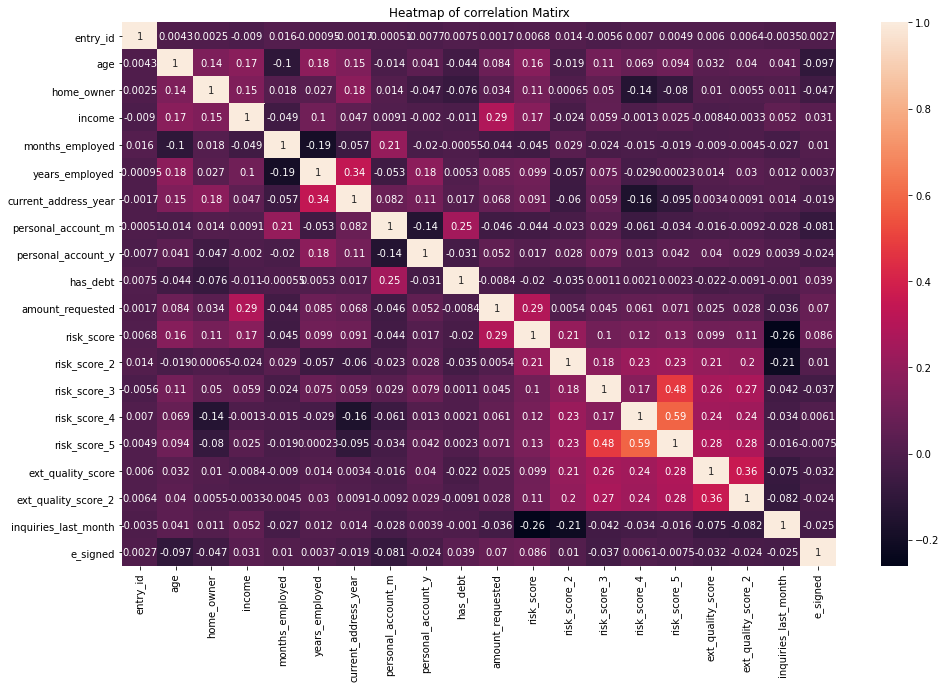

In [15]:
# Create a correlation matrix
# Cross-correlation between the different features
# Do not want all features correlated with eachother 
# Want to pay attention to explanatory features are not correlating with each other (features around .75 to pay attention too)

fig, ax = plt.subplots(figsize=(16,10)) 
corr = loan_df.corr()
sns.heatmap(corr,
            annot=True,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
plt.title('Heatmap of correlation Matirx')

corr

<AxesSubplot:title={'center':'correlation wigh E signed'}>

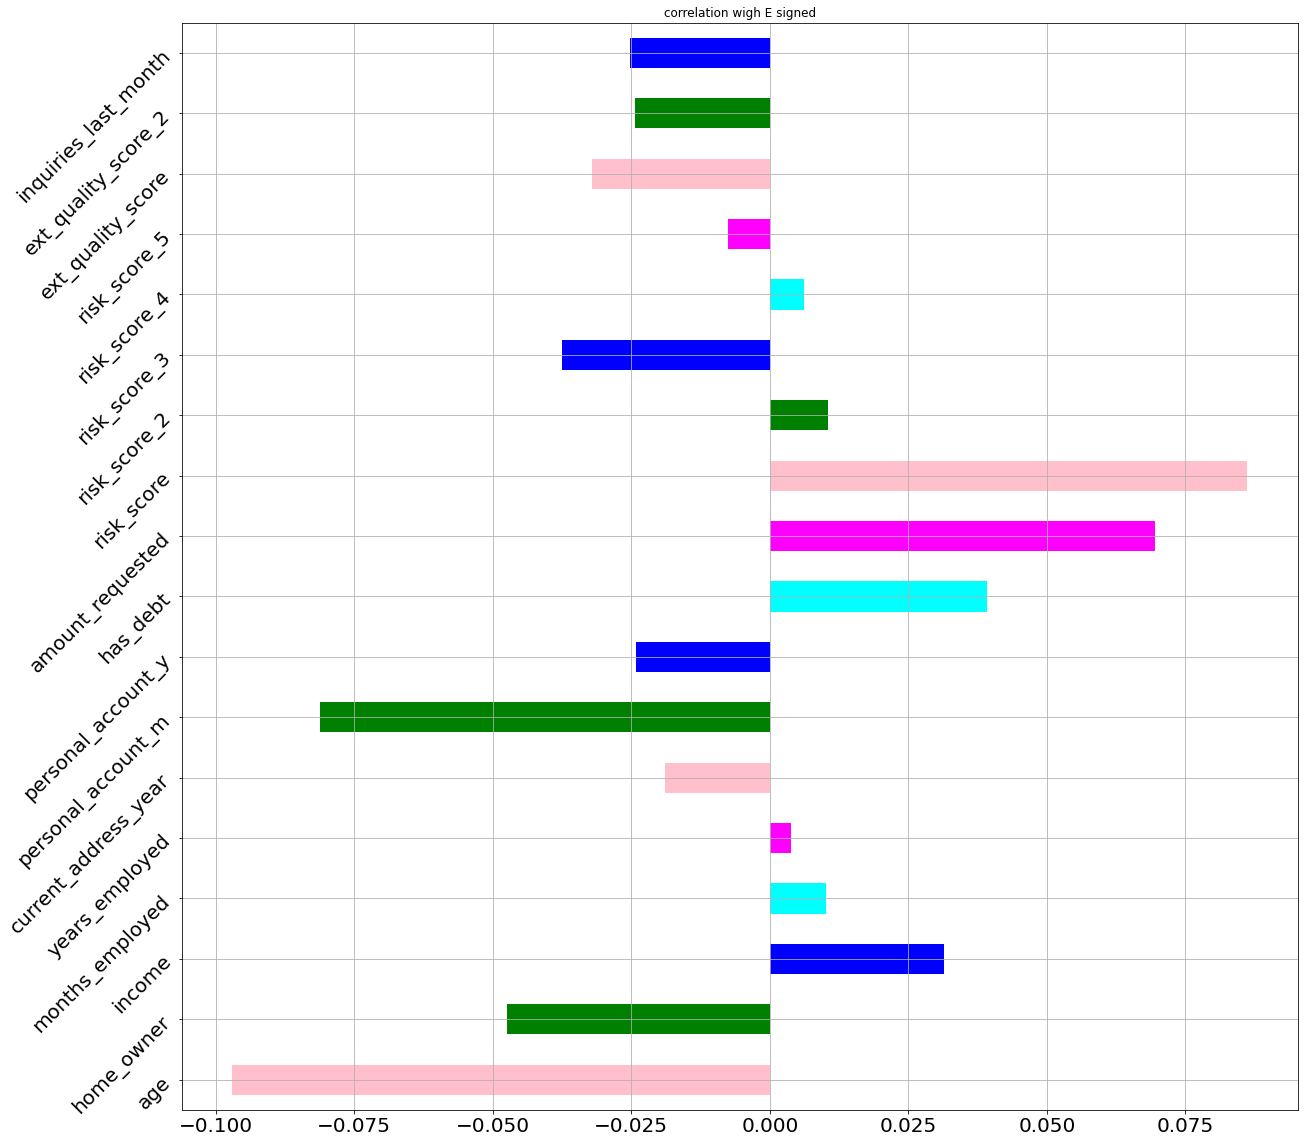

In [16]:
# Just a better correlation picture for visualization. 
# choose horizontal to align the column names better. 

#Dropping the unnecessary columns
loan_df_dropped = loan_df.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

#Correlation of independent variable with dependent variable

loan_df_dropped.corrwith(loan_df.e_signed).plot.barh(figsize=(20,20), 
                                                    title="correlation wigh E signed",
                                             fontsize=20,
                                                    rot=45,grid= True,color=['pink','green',
                                                                                  'blue','cyan','magenta'])

### Insights 
- Age is showing the strongest negative correlation with our target figure which states that the customers that are not likely to sign will go down as age raises. Along with personal account in months. 

- Risk is showing the highest positive correlation along with amount requested with our target feature.

***

<a id='Eda1'></a>
# EDA 1.
## Examine months and years employed

***

In [17]:
loan_df['months_employed'].unique()

array([ 0,  6,  3,  5,  9, 10,  1,  4,  2,  8,  7, 11])

In [18]:
loan_df['years_employed'].unique()

array([ 3,  6,  0,  5,  4,  2,  8,  1, 10,  7,  9, 12, 15, 11, 14, 16, 13])

### Insights 
- Took a look at months employed compared to years employed to see if months employeed is necessary to keep or not

***

<a id='Eda2'></a>
# EDA 2. 
## Distribution of Age, Personal Account M and Risk Score

***

Text(0, 0.5, 'Customer Count')

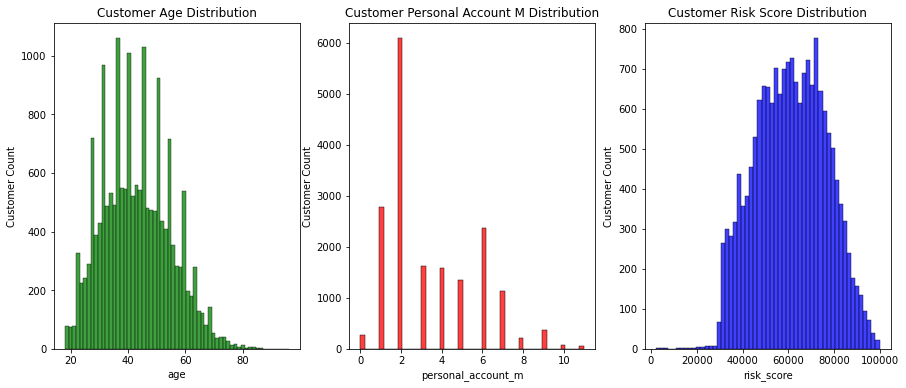

In [19]:
# Plot the distribution of Age, Personal Account M and Risk Score 

# Set up the matplotlib figure 
f, axes = plt.subplots(ncols=3,figsize=(15,6))

# Graph Area Income
sns.histplot(loan_df['age'],kde=False,color='g',ax=axes[0]).set_title('Customer Age Distribution')
axes[0].set_ylabel('Customer Count')

# Graph employee evaluation
sns.histplot(loan_df['personal_account_m'],kde=False,color='r',ax=axes[1]).set_title('Customer Personal Account M Distribution')
axes[1].set_ylabel('Customer Count')

# Graph employee Average Monthly Hours
sns.histplot(loan_df['risk_score'],kde=False,color='b',ax=axes[2]).set_title('Customer Risk Score Distribution')
axes[2].set_ylabel('Customer Count')

<AxesSubplot:xlabel='age', ylabel='Count'>

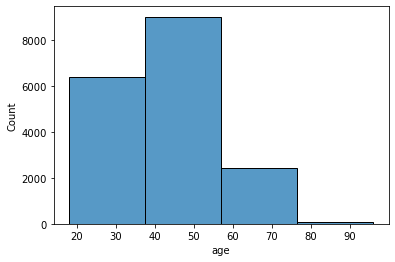

In [20]:
# Just a clearer look at the age distribution in range
sns.histplot(data=loan_df, x="age",bins = 4)

### Insights

- Can see that most customers are between the age range of 38-57 which represents most of the dataset 
- This distribution shows us that the count for 2 months in regards to personal accounts is the highest with over 6,000 but this does not reveal much insight. Knowing that we do know which of these accounts have years attached to them or not. 
- Risk distribution tends to go up alot with drops then back up between around the ranges of 30,000 to about 78,000. Shows a consistnet decrease in count starting from the risk score range of around 78,000. 

****

<a id='eda3'></a>
# EDA 3.
##  Descriptive Figures

***

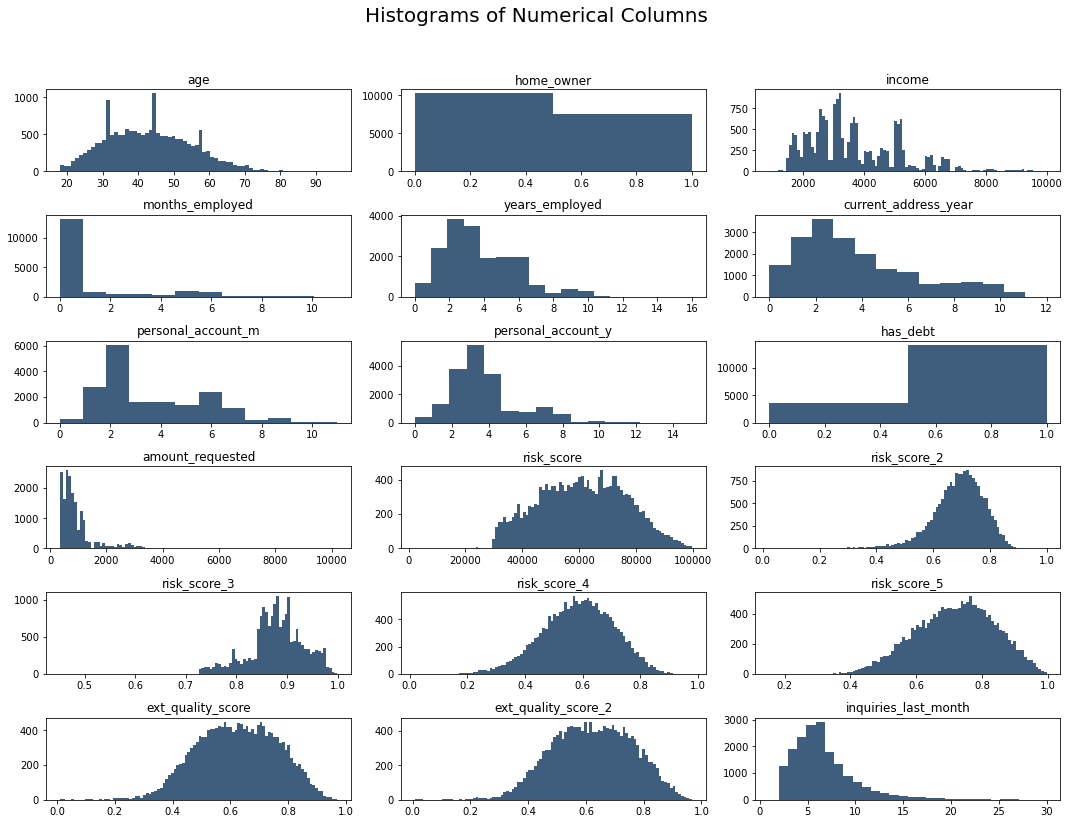

In [22]:
fig = plt.figure(figsize=(15, 12))

plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(loan_df_dropped.shape[1]):
    plt.subplot(6, 3, i + 1)   # (rows, columns)
    f = plt.gca()
    f.set_title(loan_df_dropped.columns.values[i])    # i = column name 

    vals = np.size(loan_df_dropped.iloc[:, i].unique())    # all rows and column names i 
    if vals >= 100:
        vals = 100

    plt.hist(loan_df_dropped.iloc[:, i], bins=vals, color='#3F5D7D')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Boxplots

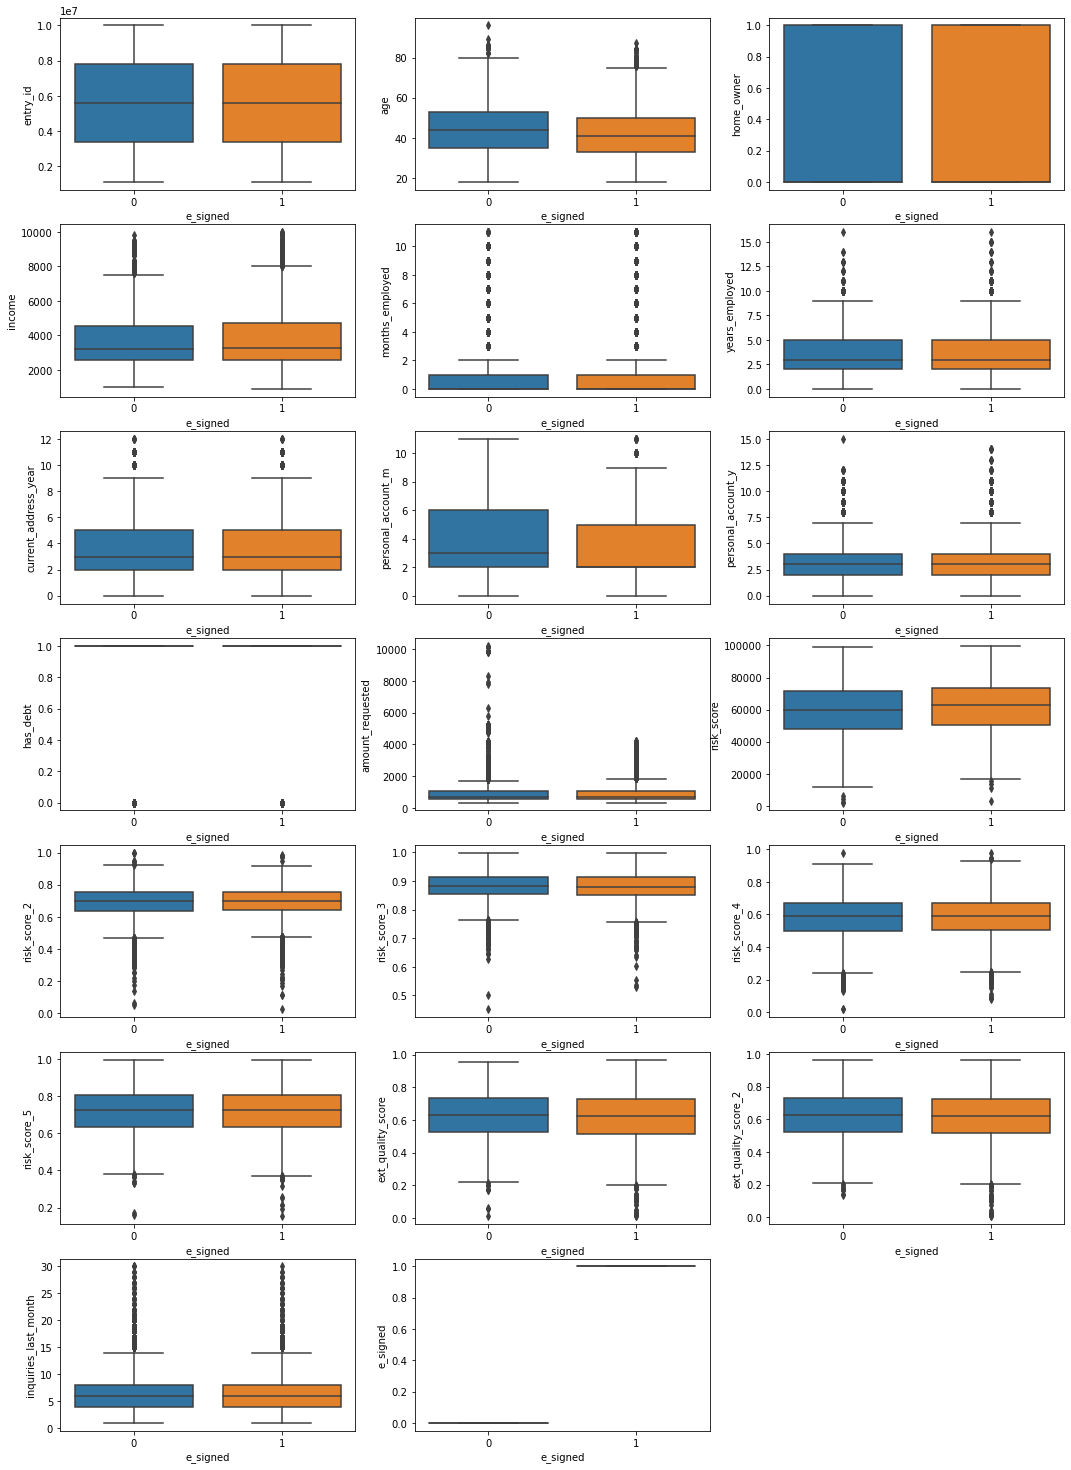

In [23]:
# Generating boxplots with respect to our target feature
creating_boxplots((18,26), target, num_vars, loan_df)

### Insights

- Most of the dataset contains customers that are in debt. 
- Unique Age values showing range mostly between 20 and 70.
- Amount requested shows most customers requested below 1500. 
- The boxplots shows us that the features in the data is spread pretty evenly when it comes to our target feature
***

<a id='Eda4'></a>
# EDA 4.
##  Distribution With Respect To Our Target Feature

***

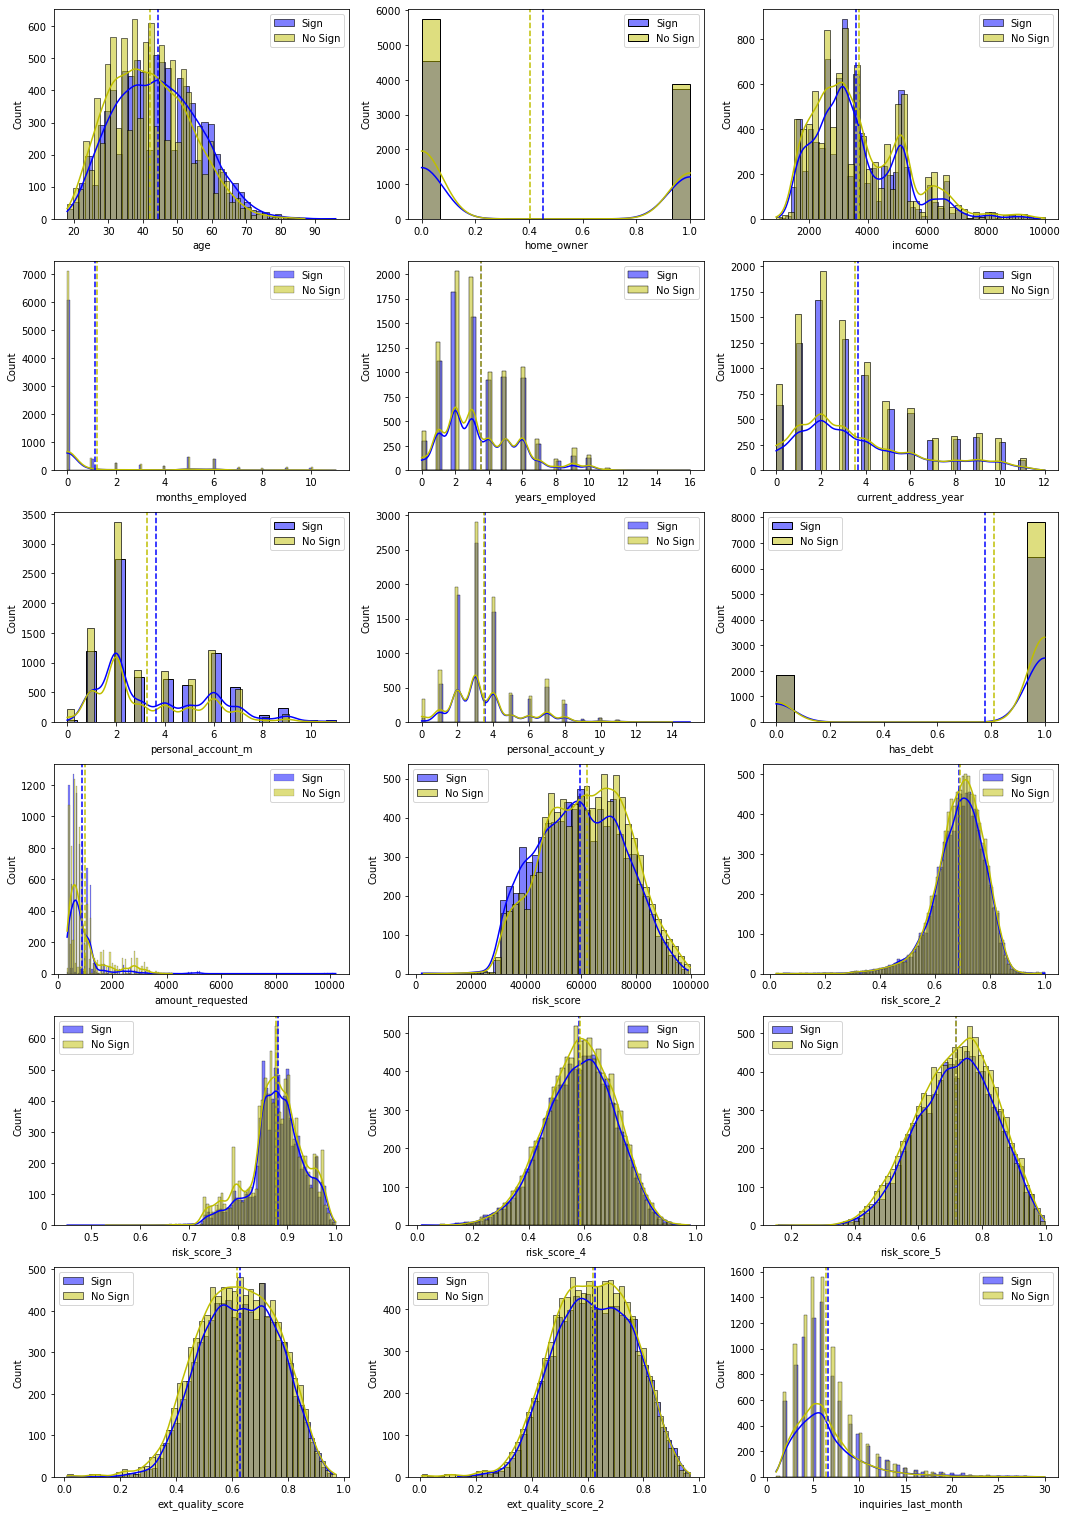

In [24]:
# Subsetting by clicks
esign_no = loan_df["e_signed"] == 1
esign_yes = loan_df["e_signed"] == 0

# Creating the plots
features = ['age', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month']
labels = ['Sign', "No Sign"]

def creating_plots(features, labels):
    plt.figure(figsize=(18,27))
    for feature in features:
        plt.subplot(6, 3, features.index(feature)+1)
        sns.histplot(loan_df[feature][esign_yes], label=labels[0], color="b",kde=True)
        sns.histplot(loan_df[feature][esign_no], label=labels[1], color="y",kde=True)
        plt.axvline(loan_df[feature][esign_yes].mean(), linestyle = '--', color="b")
        plt.axvline(loan_df[feature][esign_no].mean(), linestyle = '--', color="y")
        plt.legend()

creating_plots(features, labels)

### Insights

- It would seem correct that the customers who do not own a home or does not have debt would most likely sign for loan.
- It looks like the features are mostly normal distributed.
- Inquiries last month shows a right skew 

***

<a id='Pre_Processing'></a>
# Pre-processing 
***

- Apply **get_dummies()** to the non-ordered categorical variables 
- Seperate categorical variables and numeric variables, then combine them.

In [25]:
cat_var = ['pay_schedule']
num_var = ['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed']

categorical_df = pd.get_dummies(loan_df[cat_var],drop_first=True)
numerical_df = loan_df[num_var]

loan_df_final= pd.concat([categorical_df,numerical_df],axis=1)
loan_df_final

,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,0,0,0,7629673,40,bi-weekly,1,3135,0,3,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,0,0,1,3560428,61,weekly,0,3180,0,6,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,0,0,1,6934997,23,weekly,0,1540,6,0,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,0,0,0,5682812,40,bi-weekly,0,5230,0,6,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,0,1,0,5335819,33,semi-monthly,0,3590,0,5,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,1,0,0,9949728,31,monthly,0,3245,0,5,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,0,0,0,9442442,46,bi-weekly,0,6525,0,2,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,0,0,1,9857590,46,weekly,0,2685,0,5,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,0,0,0,8708471,42,bi-weekly,0,2515,0,3,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [26]:
#Dropping the unnecessary columns
loan_df_final = loan_df_final.drop(columns = ['pay_schedule','entry_id'])
loan_df_final

,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,0,0,0,40,1,3135,0,3,3,6,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,0,0,1,61,0,3180,0,6,3,2,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,0,0,1,23,0,1540,6,0,0,7,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,0,0,0,40,0,5230,0,6,1,2,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,0,1,0,33,0,3590,0,5,2,2,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,1,0,0,31,0,3245,0,5,3,2,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,0,0,0,46,0,6525,0,2,1,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,0,0,1,46,0,2685,0,5,1,1,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,0,0,0,42,0,2515,0,3,5,6,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


<a id='MS'></a>
# Model Selection

- Artifical neural network - Easy to understand algorithm that can handle large amount of data sets and has the ability to implicitly detect complex nonlinear relationships between dependent and independent variables. 
- Random Forest - Flexible with classification problems. 
- Gradient Boosting - Provides great predictive accuracy with lots of flexibility
- XG Boosting - Efficient and easy to use algorithm which delivers high performance and accuracy
- Support Vector Machine - Used for classification problems and produces significant accuracy with less computation power. 

- In this section, I will test various algorithms with our problem at hand to choose the best one in order to tune the model to its best parameters and to assess the different algorithms, I will use this metric:
  - Accuracy: to tell how often the model is correct in making the predictions.

<a id='Train_Test'></a>
## Data Preparation: Training and Testing Sets

In [27]:
# Create separate object for target variable
y = loan_df_final['e_signed']

# Create separate object for input features
X = loan_df_final.drop('e_signed',axis = 1)

In [28]:
# Transforming the data into same scale using StandardScaler to 

sc_X = StandardScaler()

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [30]:
# Fitting and transforming our data

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [31]:
# Just checking 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14326, 21)
(14326,)
(3582, 21)
(3582,)


<a id='ANN'></a>
## Model Selection: Artificial Neural Network

- Since deep learning neural networks contains hard coded data processing feature extraction and feature engineering. I will do ANN model before doing feature engineering. 

In [32]:
# Sequential Model
model = Sequential()

# Adding layers in ANN

model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))

model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dropout(0.3))   # Improves the generalization ability of the network (Not to overfit). Dropout 3% of data

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Fitting the ANN to the training set 

model.fit(X_train, y_train, batch_size= 10, epochs = 20)

Epoch 1/20
1433/1433 [==============================] - 18s 2ms/step - loss: 0.6825 - accuracy: 0.5523
Epoch 2/20
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6702 - accuracy: 0.5850
Epoch 3/20
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6669 - accuracy: 0.5850
Epoch 4/20
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6626 - accuracy: 0.5970
Epoch 5/20
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6613 - accuracy: 0.5946
Epoch 6/20
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6561 - accuracy: 0.6001
Epoch 7/20
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6568 - accuracy: 0.6010
Epoch 8/20
1433/1433 [==============================] - 2s 1ms/step - loss: 0.6602 - accuracy: 0.6007
Epoch 9/20
1433/1433 [==============================] - 2s 2ms/step - loss: 0.6553 - accuracy: 0.6105
Epoch 10/20
1433/1433 [==============================] - 3s 2ms/step - loss: 0.65

In [34]:
# Predict the test data using the model 
pred = model.predict(X_test)

In [35]:
# Condition to where pred is above 50%

y_pred = (pred > 0.5)

In [36]:
# check accuracy score

accuracy_score(y_pred,y_test)

0.5985482970407594

<a id='FE'></a>
# FEATURE ENGINEERING

In [37]:
# Modifying age 

Age = []

for i in range(len(loan_df_final)):
    if (loan_df_final['age'][i] <= 45):
        Age.append('Adult')
        
    else:
        Age.append('Senior')

In [38]:
# Modifying months employeed and Personal Account
# month employeed = month employeed + years employed * 12
# Personal account = account_m + account_y * 12

Employed = []
for i in range(len(loan_df_final)):
    x = loan_df_final['months_employed'][i] + loan_df_final['years_employed'][i] *12
    Employed.append(x)

In [39]:
# Modifyin Personal Account
# Personal account = account_m + account_y * 12

Pa = []

for i in range(len(loan_df_final)):
    x = loan_df_final['personal_account_m'][i] + loan_df_final['personal_account_y'][i] *12
    Pa.append(x)

In [40]:
# calculate average of risk score 

avg_risk = []

for i in range(len(loan_df_final)):
    x = (loan_df_final['risk_score_2'][i] + loan_df_final['risk_score_3'][i] + loan_df_final['risk_score_4'][i] + loan_df_final['risk_score_5'][i]) / 4
    avg_risk.append(x)

In [41]:
# Modigying Quality to average 

ext_quality = []
for i in range(len(loan_df_final)):
    x = (loan_df_final['ext_quality_score_2'][i] + loan_df_final['ext_quality_score'][i] / 2)
    ext_quality.append(x)

In [42]:
# Merging all features into dataframe 

Age = pd.DataFrame(Age)
Employed = pd.DataFrame(Employed)
Pa = pd.DataFrame(Pa)
avg_risk = pd. DataFrame(avg_risk)
ext_quality = pd.DataFrame(ext_quality)

featured = pd.concat([Age,Employed,Pa, avg_risk,ext_quality], axis = 1)   # column names for dataframe 

In [43]:
# column names for dataframe

featured.columns = ['Age','Employed', 'Pa', 'Avg_risk','Quality']

In [44]:
featured.head()

,Age,Employed,Pa,Avg_risk,Quality
0,Adult,36,30,0.661151,0.671377
1,Senior,72,86,0.789841,0.996080
2,Adult,6,19,0.691712,0.797568
3,Adult,72,86,0.793179,0.988828
4,Adult,60,98,0.688483,1.116951


In [45]:
# Creating dummy variable for Age column

dummy1 = pd.get_dummies(featured['Age'])
dummy1.head()

,Adult,Senior
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [46]:
# Dropping age variable 

featured = featured.drop(['Age'], axis = 1)
featured.head()

,Employed,Pa,Avg_risk,Quality
0,36,30,0.661151,0.671377
1,72,86,0.789841,0.996080
2,6,19,0.691712,0.797568
3,72,86,0.793179,0.988828
4,60,98,0.688483,1.116951


In [47]:
# Add dummy variables to dataframe 

featured = pd.concat([featured,dummy1], axis = 1)
featured.head()

,Employed,Pa,Avg_risk,Quality,Adult,Senior
0,36,30,0.661151,0.671377,1,0
1,72,86,0.789841,0.996080,0,1
2,6,19,0.691712,0.797568,1,0
3,72,86,0.793179,0.988828,1,0
4,60,98,0.688483,1.116951,1,0


In [157]:
#Concating the featured data and unfeatured data
X=pd.concat([X,featured],axis=1)
X.head()

,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,Employed,Pa,Avg_risk,Quality,Adult,Senior
0,0,0,0,40,1,3135,0,3,3,6,...,0.515977,0.580918,0.380918,10,36,30,0.661151,0.671377,1,0
1,0,0,1,61,0,3180,0,6,3,2,...,0.826402,0.730720,0.630720,9,72,86,0.789841,0.996080,0,1
2,0,0,1,23,0,1540,6,0,0,7,...,0.762284,0.531712,0.531712,7,6,19,0.691712,0.797568,1,0
3,0,0,0,40,0,5230,0,6,1,2,...,0.778831,0.792552,0.592552,8,72,86,0.793179,0.988828,1,0
4,0,1,0,33,0,3590,0,5,2,2,...,0.665523,0.744634,0.744634,12,60,98,0.688483,1.116951,1,0


In [158]:
#Dropping the unnecessay data from our dataset
X=X.drop(labels=["age","months_employed","years_employed","personal_account_m","personal_account_y","risk_score_2","risk_score_3"
                ,"risk_score_4","risk_score_5","ext_quality_score_2","ext_quality_score"],axis=1)

In [159]:
X.head()

,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,Employed,Pa,Avg_risk,Quality,Adult,Senior
0,0,0,0,1,3135,3,1,550,36200,10,36,30,0.661151,0.671377,1,0
1,0,0,1,0,3180,3,1,600,30150,9,72,86,0.789841,0.996080,0,1
2,0,0,1,0,1540,0,1,450,34550,7,6,19,0.691712,0.797568,1,0
3,0,0,0,0,5230,1,1,700,42150,8,72,86,0.793179,0.988828,1,0
4,0,1,0,0,3590,2,1,1100,53850,12,60,98,0.688483,1.116951,1,0


## Train test split again with new data

In [51]:
scale=StandardScaler()
#Transforming the data
X=scale.fit_transform(X)

In [52]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=0)

In [53]:
# Just checking 
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(13431, 16)
(13431,)
(4477, 16)
(4477,)


<a id='RF'></a>
## Model Selection: Random Forest Classifier

In [54]:
rf = RandomForestClassifier()

rf_result = cross_val_score(rf,Xtrain,ytrain,cv = 5, scoring='f1')

rf_result.mean()

0.6533520292874502

In [58]:
#Fitting the model
rf.fit(Xtrain,ytrain)

RandomForestClassifier()

In [79]:
#Predictions on test data
pred=rf.predict(Xtrain)

In [80]:
accuracy_score(ytrain,pred)

1.0

#### Prediction on test data using Random Forest

In [64]:
#Predictions on test data
pred=rf.predict(Xtest)

In [78]:
accuracy_score(ytest,pred)

0.6182711637257092

In [66]:
rf = rf.fit(Xtrain,ytrain)

print('\n\n ---Random Forest Model---')
rf_roc_auc = roc_auc_score(ytest,rf.predict(Xtest))
print('Random Forest AUC = %2.2f' % rf_roc_auc)
print(classification_report(ytest,rf.predict(Xtest)))



 ---Random Forest Model---
Random Forest AUC = 0.61
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      2080
           1       0.64      0.67      0.65      2397

    accuracy                           0.62      4477
   macro avg       0.62      0.61      0.61      4477
weighted avg       0.62      0.62      0.62      4477



In [67]:
confusion_matrix(ytest,rf.predict(Xtest))

array([[1170,  910],
       [ 799, 1598]])

### Play with pipe line to see if i can get a better score

In [68]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf',RandomForestClassifier())])

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
params = {
    'rf__n_estimators':[20,100,150], # Start, stop, number of trees
    'rf__min_samples_split': [2,3], # max number of samples required to split an internal node:
    'rf__max_features': ['auto', 'sqrt', 0.2], # max number of features considered for splitting a node, picking 20% of features 
    'rf__max_depth': [30, 50] # max number of splits per tree
} 

In [69]:
rf_gs = GridSearchCV(pipe,param_grid=params, scoring = 'roc_auc', cv = 3)
rf_gs.fit(Xtrain,ytrain);

In [71]:
rf_gs.score(Xtest,ytest)

0.6824921376079074

In [72]:
print('\n\n ---Random Forest Model---')
rf_roc_auc = roc_auc_score(ytest,rf_gs.predict(Xtest))
print('Random Forest AUC = %2.2f' % rf_roc_auc)
print(classification_report(ytest,rf_gs.predict(Xtest)))



 ---Random Forest Model---
Random Forest AUC = 0.63
              precision    recall  f1-score   support

           0       0.61      0.56      0.59      2080
           1       0.65      0.69      0.67      2397

    accuracy                           0.63      4477
   macro avg       0.63      0.63      0.63      4477
weighted avg       0.63      0.63      0.63      4477



In [73]:
confusion_matrix(ytest,rf_gs.predict(Xtest))

array([[1172,  908],
       [ 738, 1659]])

***

- Running a pipeline and changing some parameters did create a little better performing model when it comes to the AUC. 
- Also, perfroms a litle better on the ability of the model to not label a sample as positive if it is negative and the ability of the model to find all the positive samples.

<a id='GB'></a>
## Model Selection: Gradient Boosting

In [81]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate, max_features=2,max_depth=2,random_state=0)
    gb_clf.fit(Xtrain,ytrain)

In [84]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(Xtrain, ytrain)))

Learning rate:  1
Accuracy score (training): 0.623


#### Prediction on test data using Gradient Boosting

In [85]:
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(Xtest, ytest)))

Accuracy score (validation): 0.599


<a id='SVM'></a>
## Model Selection: Support Vector Machine

In [123]:
svm = SVC(random_state = 0, kernel = 'rbf',probability=True)
svm.fit(Xtrain,ytrain)

SVC(probability=True, random_state=0)

In [124]:
print("Accuracy score (training): {0:.3f}".format(svm.score(Xtrain, ytrain)))

Accuracy score (training): 0.660


#### Prediction on test data using SVM

In [120]:
y_pred = svm.predict(Xtest)

In [121]:
acc = accuracy_score(ytest,y_pred)
acc

0.5905740451194996

In [125]:
 svm.score(Xtest,ytest)

0.5905740451194996

In [126]:
yhat = svm.predict(Xtest)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [134]:
yhat = svm.predict(Xtest)
yhat_prob = svm.predict_proba(Xtest)

print("f1_score: ", f1_score(ytest, yhat, average='weighted') )
print("log_loss: ", log_loss(ytest, yhat_prob) )

f1_score:  0.5856322147542099
log_loss:  0.6639915544892123


<a id='XG'></a>
## Model Selection: XGBoost

- Boosting technique

In [114]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(Xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [115]:
score = xgb_clf.score(Xtrain, ytrain)
print(score)

0.8691087781996872


 #### Prediction on test data using XG Boost

In [116]:
score = xgb_clf.score(Xtest, ytest)
print(score)

0.6283225374134465


In [117]:
y_pred = xgb_clf.predict(Xtest)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.83%


In [118]:
kfold = KFold(n_splits=10)
results = cross_val_score(xgb_clf, Xtest, ytest, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 59.35% (1.93%)


### Using pipeline with gridsearch to see if I can get a better score

In [111]:
#place SelectKbest transformer XGBClassifier into Pipeine

pipe = Pipeline(steps=[
    ('Scale', StandardScaler()),
    ('fs', SelectKBest()),
('clf', XGBClassifier(use_label_encoder=False,eval_metric='logloss'))
])


#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
params = [{
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
    #'fs__score_func': [chi2],
    'fs__k': [10]
}]

# Define cross validation
kfold = KFold(n_splits=4)

# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}

# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=params,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)
# Fit grid search
model = grid.fit(Xtrain, ytrain)

Fitting 4 folds for each of 672 candidates, totalling 2688 fits


In [112]:
predict = model.predict(Xtest)
print('Best AUC Score: {}'.format(model.best_score_))
print('Accuracy: {}'.format(accuracy_score(ytest, predict)))
print(confusion_matrix(ytest,predict))

Best AUC Score: 0.6763095697495828
Accuracy: 0.6135805226714318
[[1110  970]
 [ 760 1637]]


In [113]:
# The best parameters
print(model.best_params_)

{'clf__colsample_bytree': 0.2, 'clf__gamma': 0.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 7, 'clf__n_estimators': 200, 'fs__k': 10}


<a id='Report'></a>
# REPORT

***

| Algorithm          | Accuracy |
|--------------------|----------|
| ANN                | .60      |
| Randome Forest     | .62      |
| Gradient Boosting  | .60      |
| SVM                | .59      |
| XGBoost.           | .63      |

<a id='FI'></a>
# Feature Importance

***

In [166]:
# Get feature importance 

feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index = Xtrain.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,risk_score,0.135852
1,income,0.127137
2,Quality,0.118794
3,Avg_risk,0.117657
4,amount_requested,0.111384
5,Pa,0.105768
6,Employed,0.077233
7,inquiries_last_month,0.071009
8,current_address_year,0.063253
9,has_debt,0.014890


<AxesSubplot:xlabel='importance', ylabel='index'>

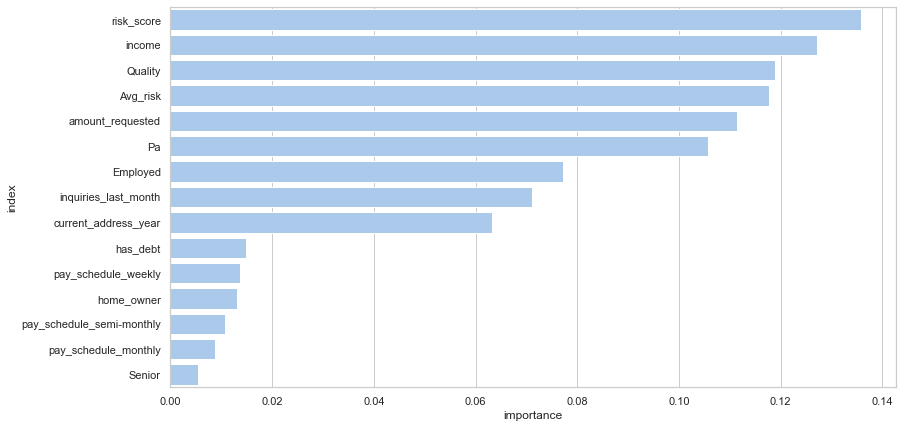

In [167]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances[:15],
            label="Total", color="b")

<a id='conclusion'></a>

# Actionable Recommendations and Conclusion

According to the models implemented. XGBoost perfomed the best when it comes to telling us how often the model is correct making the predictions at 63% and I can Identify the potential customers that will sign for loan by looking at: 

- Risk score
- Income
- Quality score which is a score based on customer's credit history and likelihood of repayment of the interest
- Average risk score. 




Even though, the models did not get a very high accuracy. The models can still help the lenders in knowing whether the customer is risky or not. Which can be improved by trying to change some of the Hyperparameters within each model and gridsearch. 


### Suggestions 

I can lower the risk of the loan company losing money by reducing the number of false positives which are the customers that are predicted to sign for loan but don't and false negatives which are the customers that are predicted to not sign but does. 
 
I can try to resolve the high number of false positives and false negatives by doing a more in depth EDA. 


Looks like model is suffering from a high variance due to the much higher training score compared to the test score and how scattered the predicted values are. Which means I can try to reduce the number of features or even increase size of training set. 

I can also try to find other potential features that would be higher correlated than the ones I have or do more feature engineering. 


